In [4]:
import pandas as pd
import pub_utils as pu

## Compare two connectomes

Given the path to csv of 2 connectomes that follow the standard format, compare their dimensions and connections

In [ ]:
result = pu.compare_connectomes(                                                                                                                                       
      '../connectomes/preassembled/structural/chemical_Cook2019.csv',                                                                                                                                       
      '../connectomes/preassembled/structural/chemical_WhiteWhole.csv',                                                                                                                                                                                                                                                                                                                                                   
)                                 
                                                                                                                                                                                                                                        
print(result['summary'])

                               Metric      Value
0                    Neurons (common)   302.0000
1    Connections in chemical_Cook2019  3709.0000
2  Connections in chemical_WhiteWhole  2266.0000
3                   Overlap (in both)  2065.0000
4           Only in chemical_Cook2019  1644.0000
5         Only in chemical_WhiteWhole   201.0000
6                  Jaccard similarity     0.5281
7                 Pearson correlation     0.7624


In [6]:
result = pu.compare_connectomes(                                                                                                                                       
      '../connectomes/preassembled/structural/chemical_WitvlietA_07.csv',                                                                                                                                       
      '../connectomes/preassembled/structural/chemical_WitvlietA_08.csv',                                                                                                                                                                                                                                                                                                                                                   
  )                                 
                                                                                                                                                                                                                                        
print(result['summary'])

                                 Metric      Value
0                      Neurons (common)   302.0000
1  Connections in chemical_WitvlietA_07  1944.0000
2  Connections in chemical_WitvlietA_08  1933.0000
3                     Overlap (in both)  1279.0000
4         Only in chemical_WitvlietA_07   665.0000
5         Only in chemical_WitvlietA_08   654.0000
6                    Jaccard similarity     0.4923
7                   Pearson correlation     0.8887


In [5]:
result = pu.compare_connectomes(                                                                                                                                       
      '../connectomes/preassembled/molecular/FLP-1_DMSR-7_RipollSanchez2023_longRange.csv',       # preassembled by RipollSanchez2023                                                                                                                                 
      '../connectomes/candy_assembly/flp-1_01_dmsr-7.csv',                              # custom assembly by candy                                                                                                                                                                                                                    
  )                                                                                                                                                                      
                                                                                                                                                                         
print(result['summary'])

                                              Metric  Value
0                                   Neurons (common)  302.0
1  Connections in FLP-1_DMSR-7_RipollSanchez2023_...  204.0
2                     Connections in flp-1_01_dmsr-7  204.0
3                                  Overlap (in both)  204.0
4   Only in FLP-1_DMSR-7_RipollSanchez2023_longRange    0.0
5                            Only in flp-1_01_dmsr-7    0.0
6                                 Jaccard similarity    1.0
7                                Pearson correlation    1.0


## Compare Cook2019 against Cook2020

Comparing 20 neurons from I1L to NSMR
Neurons: ['I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'M1', 'M2L', 'M2R', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR']

Are they identical? False
Comparing 20 neurons from I1L to NSMR
Neurons: ['I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'M1', 'M2L', 'M2R', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR']

Are they identical? False


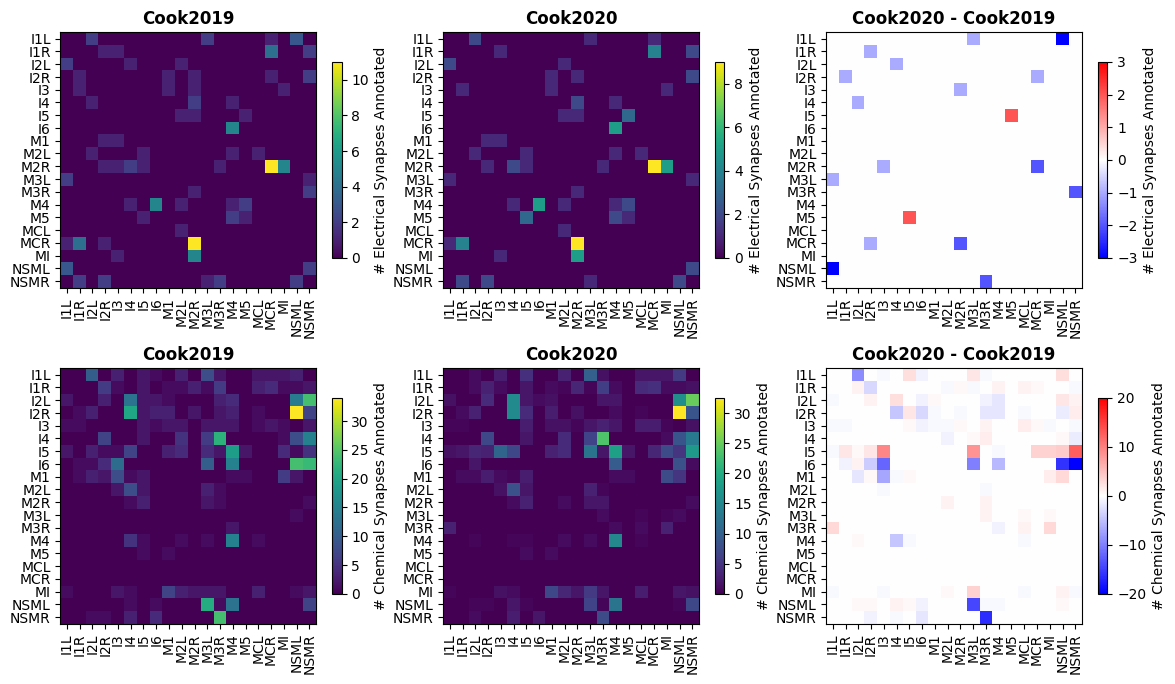

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd

# Load the two datasets
cook2019 = pd.read_csv('../connectomes/preassembled/structural/electrical_Cook2019.csv', index_col=0)
cook2020 = pd.read_csv('../connectomes/preassembled/structural/electrical_Cook2020.csv', index_col=0)

# Get the neuron order from I1L to NSMR
neurons = list(cook2019.index)
start_idx = neurons.index('I1L')
end_idx = neurons.index('NSMR')
subset_neurons = neurons[start_idx:end_idx+1]

print(f"Comparing {len(subset_neurons)} neurons from I1L to NSMR")
print(f"Neurons: {subset_neurons}")

# Extract subsets
cook2019_sub = cook2019.loc[subset_neurons, subset_neurons]
cook2020_sub = cook2020.loc[subset_neurons, subset_neurons]

# Compare
are_equal = cook2019_sub.equals(cook2020_sub)
print(f"\nAre they identical? {are_equal}")

import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.imshow(cook2019_sub)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2019', fontweight='bold')
plt.colorbar(label='# Electrical Synapses Annotated', shrink=0.7)

plt.subplot(2,3,2)
plt.imshow(cook2020_sub)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2020', fontweight='bold')
plt.colorbar(label='# Electrical Synapses Annotated', shrink=0.7)

plt.subplot(2,3,3)
plt.imshow(cook2020_sub - cook2019_sub, cmap='bwr', vmax=3, vmin=-3)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2020 - Cook2019', fontweight='bold')
plt.colorbar(label='# Electrical Synapses Annotated', shrink=0.7)


# Load the two datasets
cook2019 = pd.read_csv('../connectomes/preassembled/structural/chemical_Cook2019.csv', index_col=0)
cook2020 = pd.read_csv('../connectomes/preassembled/structural/chemical_Cook2020.csv', index_col=0)

# Get the neuron order from I1L to NSMR
neurons = list(cook2019.index)
start_idx = neurons.index('I1L')
end_idx = neurons.index('NSMR')
subset_neurons = neurons[start_idx:end_idx+1]

print(f"Comparing {len(subset_neurons)} neurons from I1L to NSMR")
print(f"Neurons: {subset_neurons}")

# Extract subsets
cook2019_sub = cook2019.loc[subset_neurons, subset_neurons]
cook2020_sub = cook2020.loc[subset_neurons, subset_neurons]

# Compare
are_equal = cook2019_sub.equals(cook2020_sub)
print(f"\nAre they identical? {are_equal}")

plt.subplot(2,3,4)
plt.imshow(cook2019_sub)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2019', fontweight='bold')
plt.colorbar(label='# Chemical Synapses Annotated', shrink=0.7)

plt.subplot(2,3,5)
plt.imshow(cook2020_sub)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2020', fontweight='bold')
plt.colorbar(label='# Chemical Synapses Annotated', shrink=0.7)

plt.subplot(2,3,6)
plt.imshow(cook2020_sub - cook2019_sub, cmap='bwr', vmax=20, vmin=-20)
plt.xticks(range(len(subset_neurons)), subset_neurons, rotation=90)
plt.yticks(range(len(subset_neurons)), subset_neurons)
plt.title('Cook2020 - Cook2019', fontweight='bold')
plt.colorbar(label='# Chemical Synapses Annotated', shrink=0.7)
plt.show()
plt.savefig('../plots/compare_Cook2019_Cook2020.png')